# Prabal Ghosh roll- AM.SC.P2CSC20040 assignment-6-(kernal_svm)_MACHINE LEARNING

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

In [126]:
iris=pd.read_csv('D:\\semester 3 videos\\Machine Learning\\notes\\Lab\\Lab6_11_10\\IRIS.csv')


In [127]:
iris.tail()


,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [128]:
# Import label encoder 
from sklearn import preprocessing 

# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column 'Species'. 
iris['species']= label_encoder.fit_transform(iris['species']) 

iris['species'].unique()

array([0, 1, 2])

In [129]:
x=iris.iloc[:,[0,1]]
y=iris.iloc[:,4]
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [130]:
from sklearn import svm
model=svm.SVC()

In [131]:
model.fit(x_train, y_train)


SVC()

In [132]:
pred=model.predict(x_test)


In [133]:
from sklearn.metrics import classification_report, confusion_matrix


In [134]:
print(confusion_matrix(y_test,pred))


[[14  0  0]
 [ 0 11  7]
 [ 0  3 10]]


In [135]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.79      0.61      0.69        18
           2       0.59      0.77      0.67        13

    accuracy                           0.78        45
   macro avg       0.79      0.79      0.78        45
weighted avg       0.80      0.78      0.78        45



In [136]:
x=iris.iloc[:,[0,2]].values
y=iris.iloc[:,4].values
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [137]:
rbf_svc = svm.SVC(kernel='rbf', gamma=100, C=1).fit(x_train, y_train)   # Gaussian (RBF) kernal



In [138]:
poly_svc = svm.SVC(kernel='poly', degree=2, C=1).fit(x_train, y_train)    # Polynomial kernal

# Gaussian (RBF) kernal

In [139]:

pred=rbf_svc.predict(x_test)


In [140]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test, pred))
print(accuracy_score(y_test, pred))

[[11  0  3]
 [ 0 12  6]
 [ 0  1 12]]
              precision    recall  f1-score   support

           0       1.00      0.79      0.88        14
           1       0.92      0.67      0.77        18
           2       0.57      0.92      0.71        13

    accuracy                           0.78        45
   macro avg       0.83      0.79      0.79        45
weighted avg       0.85      0.78      0.79        45

0.7777777777777778


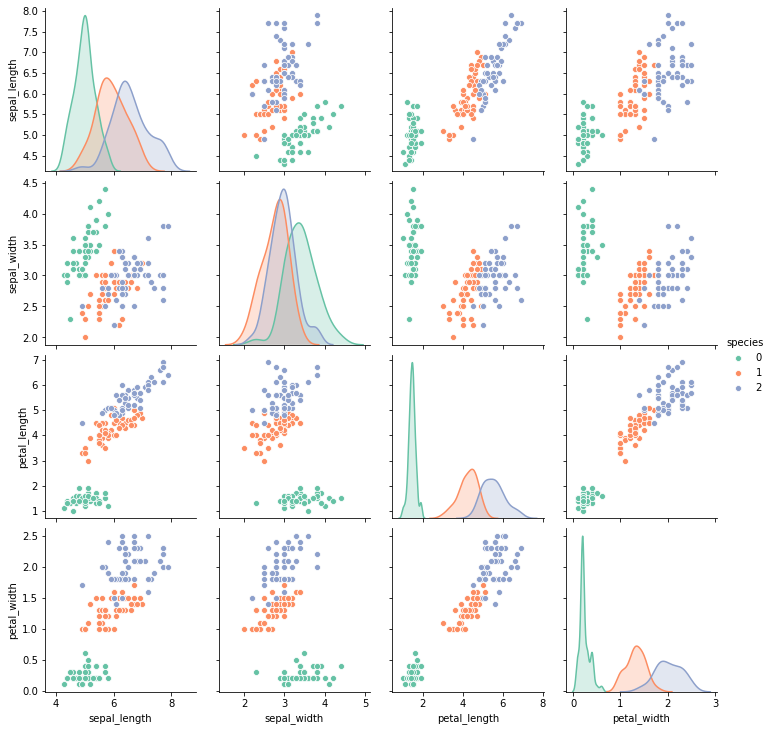

In [141]:
sns.pairplot(data=iris, hue='species', palette='Set2')


# Polynomial kernal

In [142]:


from sklearn.metrics import accuracy_score
pred=poly_svc.predict(x_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test, pred))
print(accuracy_score(y_test, pred))

[[14  0  0]
 [ 0 18  0]
 [ 0  0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

1.0


In [143]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

C:\Users\Prabal Ghosh\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


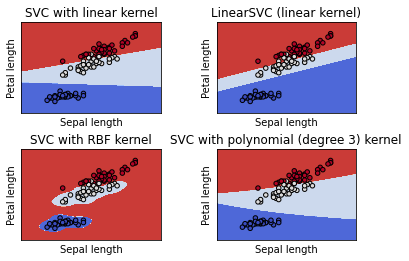

In [144]:
C = 1 # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(),
          svm.SVC(kernel='rbf', gamma=10, C=C),
          svm.SVC(kernel='poly', degree=2, C=C))
models = (clf.fit(x_train, y_train) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = x_train[:, 0], x_train[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm)
    ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20,edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Petal length')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()